# LAB 3: LINEAR REGRESSION USING ROBUST FUNCTIONS

## 1. INTRODUCTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_sample(angle_deg=45, n_samples=100):
    m = [0.,0.]
    angle = angle_deg * np.pi / 180
    rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    
    lamb = np.array([[n_samples, 0],[0, 1]])
    s = np.dot(rot, np.dot(lamb, rot.transpose()))
    c = np.random.multivariate_normal(m, s, n_samples)
    
    return c

In [3]:
c = generate_sample()
x, y = c[:, 0].ravel(), c[:, 1].ravel()

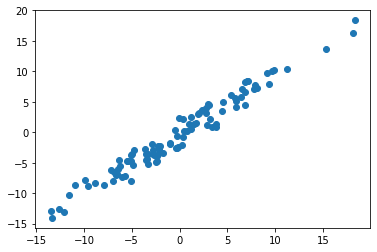

In [4]:
plt.scatter(x, y)

In [5]:
def error(x, y, w):
    return 1 / 2 * np.sum((w[0] * x + w[1] - y) ** 2)

def grad_error(x, y, w):
    return np.array([np.sum((w[0] * x + w[1] - y) * x), np.sum(w[0] * x + w[1] - y)])

In [6]:
def adapting_gradient_descent(x, y, f, grad_f, tol=1e-5, max_iter=250):
    np.random.seed(42)
    w = np.random.uniform(0, 1, (2, ))
    n = 0
    path = [w]
    alpha = 1
    
    while np.linalg.norm(grad_f(x, y, w)) >= tol and n < max_iter:
        alpha = 1
        
        while f(x, y, w - alpha * grad_f(x, y, w)) - f(x, y, w) >= 0:
            alpha = alpha / 2
        
        n = n + 1
        w = w - alpha * grad_f(x, y, w)
        path.append(w)
    
    return w, np.array(path), n

In [7]:
w_opt, path, n = adapting_gradient_descent(x, y, error, grad_error)
print(w_opt)

In [8]:
print(w_opt)

[ 0.96865722 -0.23426745]


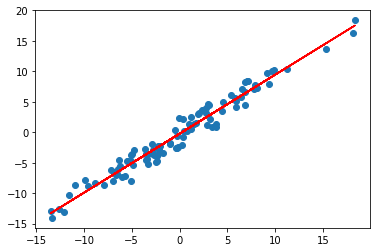

In [9]:
plt.plot(x, w_opt[0] * x + w_opt[1], 'r')
plt.scatter(x, y)

Adding an outlier

In [10]:
x[1] = -40
y[1] = 20

In [11]:
w_opt, path, n = adapting_gradient_descent(x, y, error, grad_error)
print(w_opt)

[0.55782891 0.05767481]


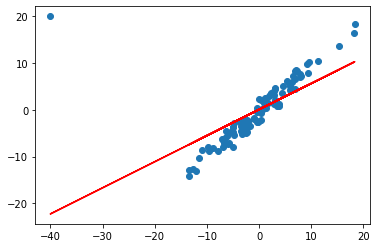

In [12]:
plt.plot(x, w_opt[0] * x + w_opt[1], 'r')
plt.scatter(x, y)